# Julie Flament



## Research question/interests
**How does a lack of resources due to low wealth affect the literacy rate?**
# Briefly describe your research question or interests here.
To answer my question, I will compare three levels of wealth: rich, middle-class, and poor. I will use the wealth column in our data set that classifies each individual into a specific quintile (1-5). I will presumably use a bar graph with three bars representing the different wealth levels. A bar graph will highlight the differences in literacy rates due to the unequal distribution of wealth.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_function2 as pf


#data = pd.read_csv("../data/raw/dataset_raw.csv",low_memory=False)
#data

In [3]:
dataset = pf.set_data("../data/raw/dataset_raw.csv")

**How does the literacy rate change around the world?**
With this plot, I am comparing the literacy rates between regions around the world. In order to relate this to wealth, I am also comparing the different income groups within these regions. Not every region has countries of every income level, however, they all have upper-middle income countries and lower-middle income countries (orange and green). When looking at the graph, we discover that throughout the regions, upper-middle income countries always had a high literacy rate. In fact, most regions were close to having a 100% literacy rate. On the other hand, we learn that low income countries have an average of 60% literacy rate throughout the regions. This is significantly lower than upper-middle income countries. Because the higher income countries had a much higher literacy rate than lower income countries, we can assume that wealth does impact the literacy rate.

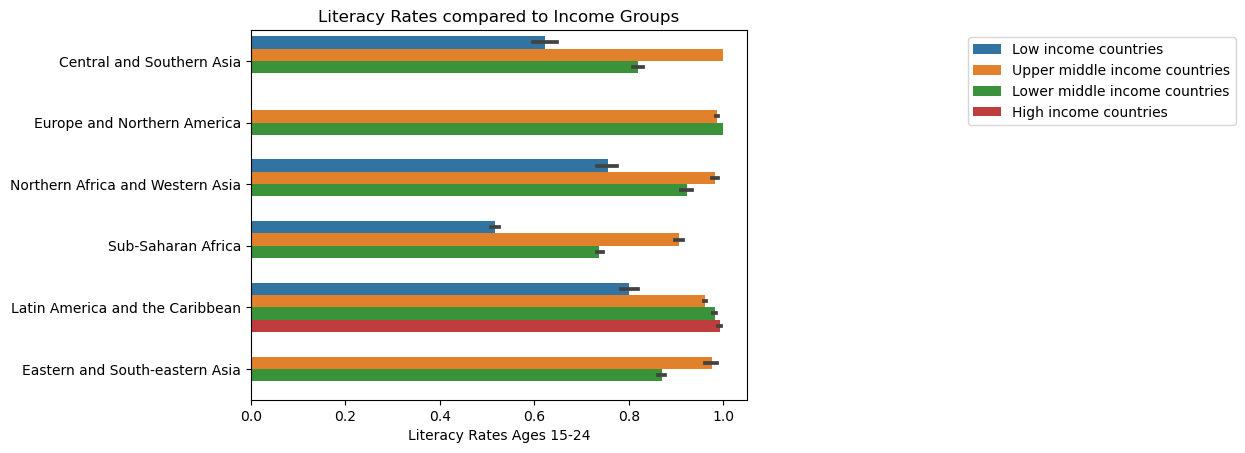

In [8]:
pf.barplot(dataset)

**How does the education level change when compared to income groups?**
With these plots, I am comparing the percentage of people who completed a certain education level in each income groups. My first plot shows the percentage of people who completed primary school. We discover that throughout the majority of the income levels, on average 80+% of people completed primary school. In low income countries, the average was 40%. In the second graph, we see that the average percentage of people who completed lower secondary school dropped, especially in lower middle income countries, higher income countries still have a relatively high completion rate. In my last graph, we notice that the average percentage of people who completed upper secondary school significantly dropped in every income group but once again the higher income countries have a higher completion rate. We can conclude wealth level impacts education level which impacts literacy rates. 

[Text(0.5, 0, '% of People Who Completed Primary School'), Text(0, 0.5, '')]

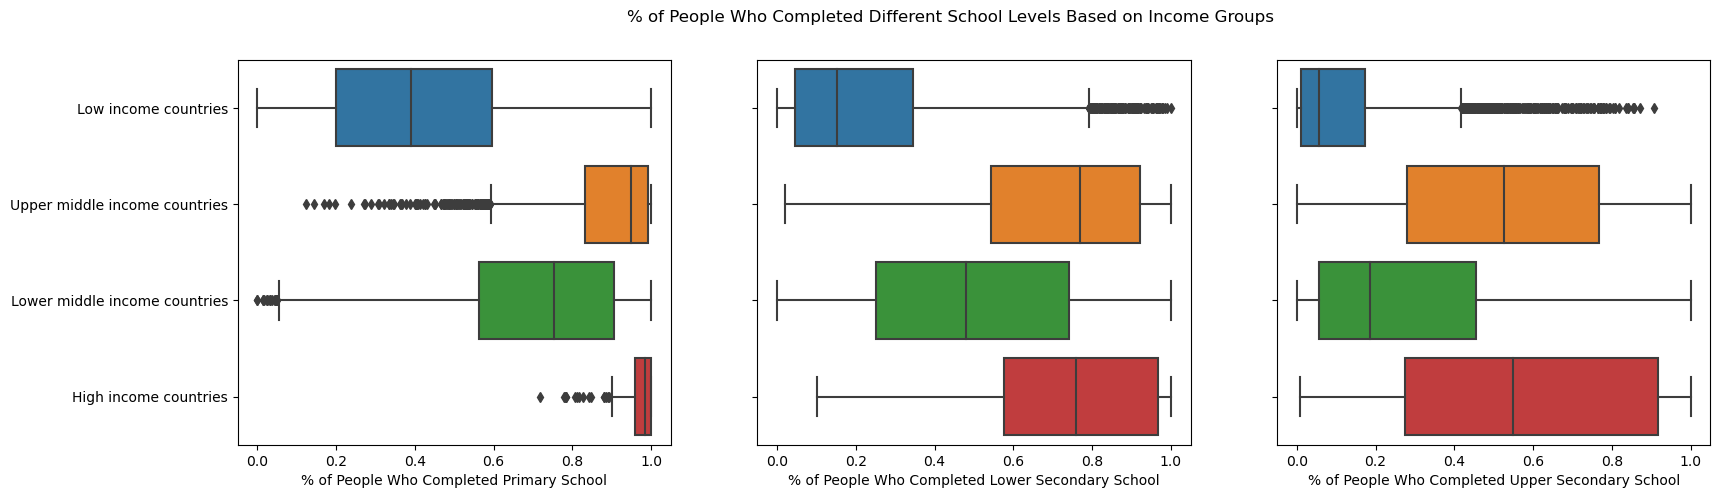

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(19, 5),sharey=True)
fig.suptitle('% of People Who Completed Different School Levels Based on Income Groups')
sns.boxplot(ax=axes[2], data=dataset, x = "comp_upsec_v2_m", y = "income_group").set(xlabel = "% of People Who Completed Upper Secondary School", ylabel = "")
sns.boxplot(ax=axes[1], data=dataset, x = "comp_lowsec_v2_m", y = "income_group").set(xlabel = "% of People Who Completed Lower Secondary School", ylabel = "")
sns.boxplot(ax=axes[0], data=dataset, x = "comp_prim_v2_m", y = "income_group").set(xlabel = "% of People Who Completed Primary School", ylabel = "")


**How does the literacy rate change across different income groups based on sex?**
The table below shows the number of countries per income group used in the plot. With the plot, we can see that throughout every income group, males had higher literacy rates than women. Only low income countries did not have an almost 100% literacy rate for males. The higher the income, the higher the literacy rate in both males and females. We can conclude that because wealth especially affects the literacy rate in men, men are prioritized in education.

In [43]:
low = dataset['income_group'].value_counts()["Low income countries"]
lomi = dataset['income_group'].value_counts()["Lower middle income countries"]
upmi = dataset['income_group'].value_counts()["Upper middle income countries"]
high = dataset['income_group'].value_counts()["High income countries"]

print(f"Lower Income Countries: {low} \nLower Middle Income Countries: {lomi} \nUpper Middle Income Countries: {upmi} \nHigh Income Countries: {high}")


Lower Income Countries: 7710 
Lower Middle Income Countries: 11982 
Upper Middle Income Countries: 5499 
High Income Countries: 367


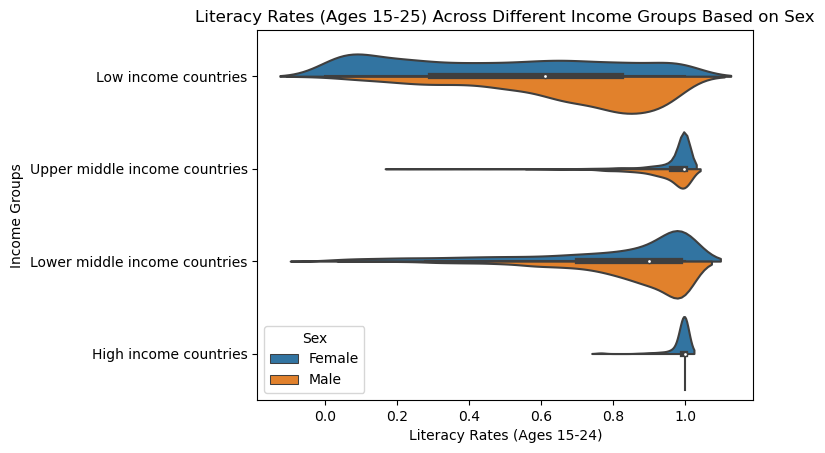

In [7]:
pf.violinplot(dataset)


## Research question/interests
**Does gender affect how wealth impacts literacy rates around the world?**
Are there countries where being wealthier results in only one gender having higher literacy rates?


My plan is to create a new plots that specifically compare wealth and gender. Now that I compared wealth to region, I can compare it to gender which will provide me with even more insight on how wealth affect literacy rates. I plan on continuing to use the literacy_1524_m and literacy_1527_no columns to provide data. I also now plan to use the column Gender. I will create several bar plots each comparing Gender and Wealth. Finally, I will create a FaceGrid plot to compare income_groups with gender.

### Notes regarding the data collected above

- countries in Latin-American and the Caribbean have higher literacy rates throughout most of the Quintiles. Why does wealth have a lesser impact on literacy rates in those regions?
- countries in Sub-Saharan Africa have an overall lower literacy rates no matter the quintile. However, the higher the quintile, the more there are a few countries in Sub-Saharan Africa that have a higher literacy rate. Wealth clearly has an effect on the literacy rates in this region. 
- Central and Southern Asian countries have higher literacy rates (only in quintile 3-5) than other countries 

